<a href="https://colab.research.google.com/github/JoanNjoki/Data_Analysis_using_KNN-_and_Naive_Bayes/blob/main/Titanic_Moringa_Data_Science_Core_W9_Independent_Project_2021_06_Joan_Mwangi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Data Analysis

## 1. Defining the Question

### a) The question

> Basing it on the titanic disaster, can the dataset correctly classify survivors and non-survivors.

### b) Metric for success

Correctly classifying survivors and non survivors of the titanic disaster based on the accuracy scores attained.

### c) The context 

On 15th April 1912, the Royal Mail Ship(RMS) sank after hitting an iceberg during its maiden voyage to Newyork City from the SouthHampton, England. Unfortunately, 1500 out of the 2224 passengers and crew died due to inadequate life boats. This data analysis will use Naive Bayes classifier, a machine learning technique, to predict if the type of individual could have contributed to their survival.

### d) Experimental Design

I'll use the following steps in my analysis:
* Importing the necessary libraries
* Loading the dataset
*  Data cleaning
* Carrying out exploratory data analysis
* Fitting the model and making predictions
* Challenging the solution
* Making a conclusion based on the analysis

### e) Data Relevance

Socio-economic factors such as age, gender, cabin, class, fare could elaborate on the passenger's survival status.

## 2. Reading the Data

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the Data from the source i.e. csv
titanic = pd.read_csv('/content/train (5).csv')



## 3. Checking the Data

In [ ]:
#Determining the no of records stored within the dataseet
print('The total no of records within the dataset are:',titanic.shape)

The total no of records within the dataset are: (891, 12)


In [ ]:
# Previewing the top of our dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the bottom of our dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Checking whether each column has an appropriate datatype
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. Tidying the Dataset

<Figure size 648x360 with 0 Axes>

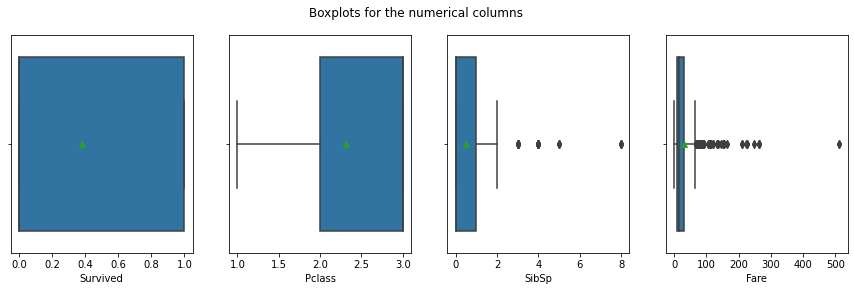

In [ ]:
#checking for outliers in Survived, Pclass, Sibsp, Fare columns
fig = plt.figure(figsize=(9,5),edgecolor='red')
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(15,4))
fig.suptitle('Boxplots for the numerical columns')
sns.boxplot(data=titanic,x=titanic['Survived'],ax=ax1,showmeans=True)
sns.boxplot(data=titanic,x=titanic['Pclass'],ax=ax2,showmeans=True)
sns.boxplot(data=titanic,x=titanic['SibSp'],ax=ax3,showmeans=True)
sns.boxplot(data=titanic,x=titanic['Fare'],ax=ax4,showmeans=True)
#outliers will not be dropped

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Checking for unique values within the columns
columns = titanic[['SibSp','Sex','Ticket','Cabin','Embarked']]
for i in columns:
  print(i)
  print(titanic[i].nunique())
  print(titanic[i].unique())
  print('\n')

SibSp
7
[1 0 3 4 2 5 8]


Sex
2
['male' 'female']


Ticket
681
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 1

In [ ]:
# Identifying the Missing Data
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Filling in missing data
titanic.Age.fillna(titanic['Age'].median(),inplace=True)
titanic.embarked = titanic.Cabin.fillna('B96 B98',inplace=True)
titanic.embarked = titanic.Embarked.fillna('S',inplace=True)

In [ ]:
#confirming if the missing values have been filled
titanic.isnull().sum().sum()

0

In [ ]:
#checking for duplicated values
titanic.duplicated().sum()
#there are no duplicated values

0

In [ ]:
#descriptive statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#lowering the case of the column names
titanic.columns = titanic.columns.str.lower()
#previewing the column names
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

## 6. Exploratory Analysis

##Univariate Analysis

####**Histograms**

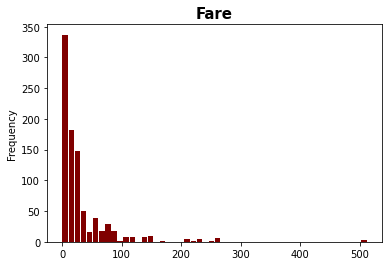

In [ ]:
#plotting the fare histogram
titanic['fare'].plot.hist(bins=50,rwidth=0.9,color='maroon')
plt.title('Fare',fontsize=15,color='black',weight='bold')
plt.show()

> *Most passengers paid for their tickets at the lowest rates between 0 and 50.*

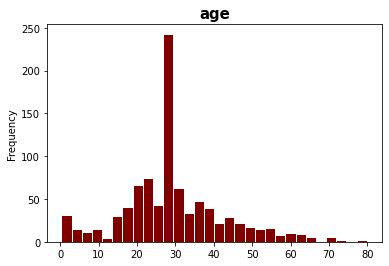

In [ ]:
#plotting the histogram parch
titanic['age'].plot.hist(bins=30,rwidth=0.9,color='maroon')
plt.title('age',fontsize=15,color='black',weight='bold')
plt.show()

> *Most passengers that aboarded the titanic ranged from 20 to 30 years.*

###**Barplots**

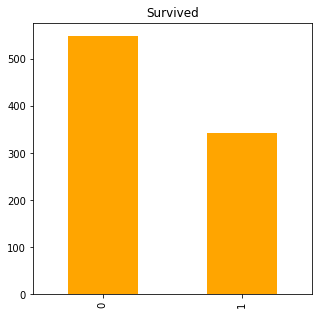

In [ ]:
#bar graph of survived cases
titanic['survived'].value_counts().plot(kind='bar', figsize=(5,5),title='Survived',color='orange')
plt.show()

*Majority of the passengers didnt survive with a count of more than 500*

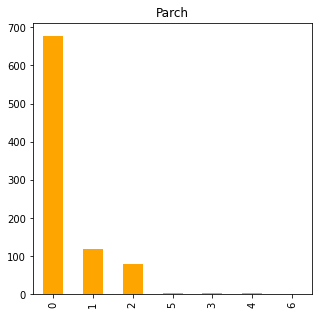

In [ ]:
#bar graph of parch
titanic['parch'].value_counts().plot(kind='bar', figsize=(5,5),title='Parch',color='orange')
plt.show()

*Passengers at category 0 had the most passengers*

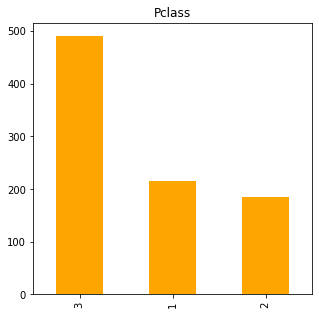

In [ ]:
#bar graph of pclass cases
titanic['pclass'].value_counts().plot(kind='bar', figsize=(5,5),title='Pclass',color='orange')
plt.show()

*Pclass 3 had the most passengers*

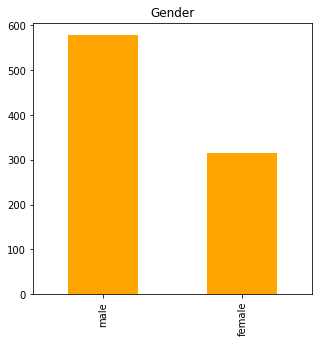

In [ ]:
#bar graph of gender
titanic['sex'].value_counts().plot(kind='bar', figsize=(5,5),title='Gender',color='orange')
plt.show()

*Passengers that aboarded the titanic were mostly male with a count of more than 500*

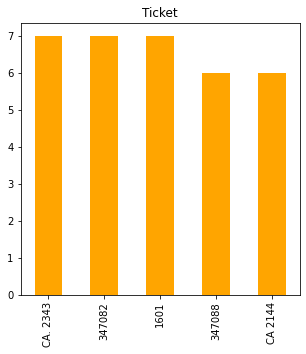

In [ ]:
#bar graph of ticket
titanic['ticket'].value_counts().nlargest(5).plot(kind='bar', figsize=(5,5),title='Ticket',color='orange')
plt.show()

*Ticket no CA 2343,347082,1601 had the highest count*

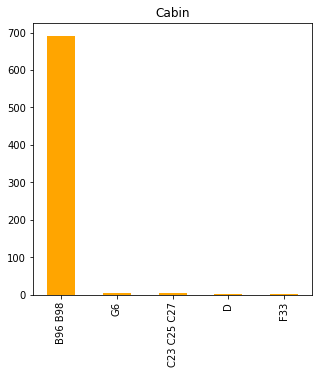

In [ ]:
#bar graph of ticket
titanic['cabin'].value_counts().nlargest(5).plot(kind='bar', figsize=(5,5),title='Cabin',color='orange')
plt.show()

*Cabin number G6, C23 C25 C27,B96 B98 had the most counts*

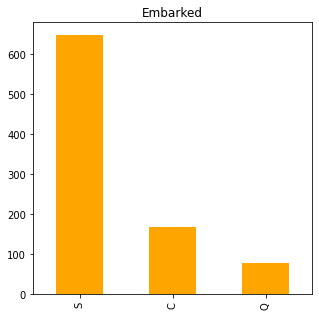

In [ ]:
#bar graph of ticket
titanic['embarked'].value_counts().nlargest(5).plot(kind='bar', figsize=(5,5),title='Embarked',color='orange')
plt.show()

*Embarked in category S had the most count*

## **Bivariate Analysis**

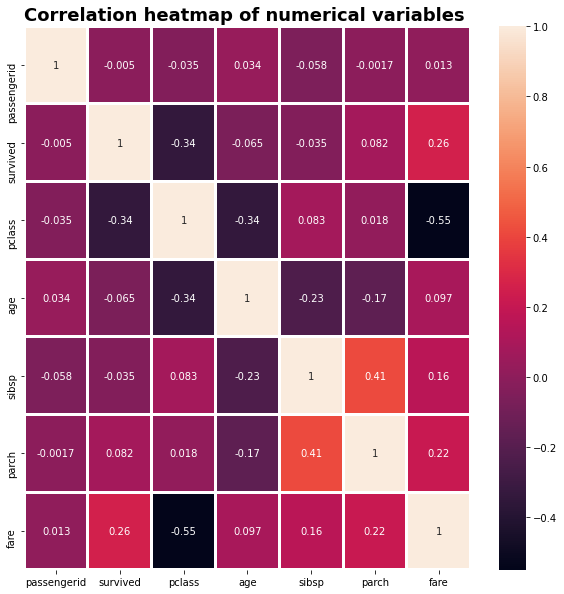

In [ ]:
#correlation among variables
corr = titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=2.0,annot=True)
plt.title('Correlation heatmap of numerical variables',fontsize=18,weight='bold',loc='left')
plt.show()

>The following columns are negatively correlated:
* Fare and Pclass
* Parch and Sibsp
* Survived and Age
* Plcass and parch and age

 > The following columns are positively correlated

* Sibsp and parch

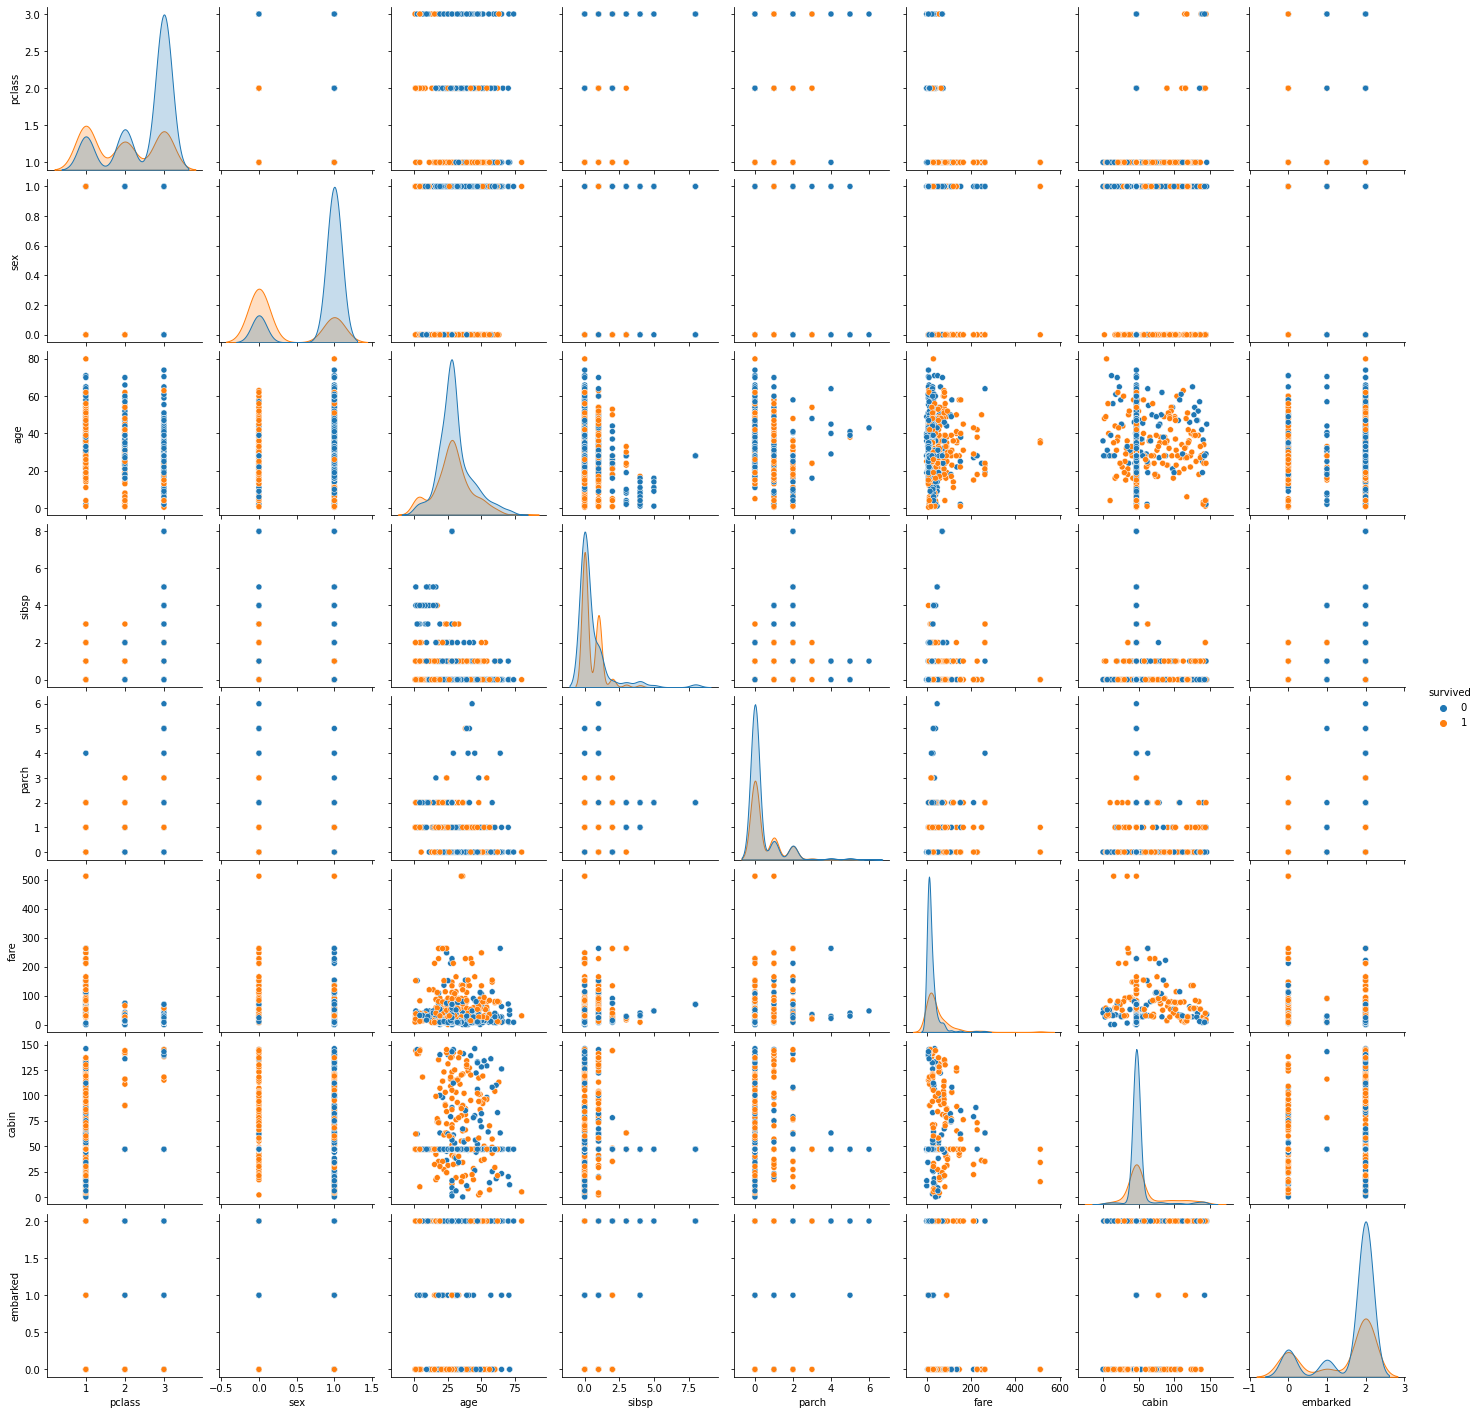

In [ ]:
#using pairplots
sns.pairplot(titanic,hue='survived')

## 6. Implementing the Solution

### Using KNearest Neighbors without cross validation

In [ ]:
#dropping unnecessary columns
titanic = titanic.drop(['passengerid','ticket','name'],axis=1)

In [ ]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
titanic['embarked'] = en.fit_transform(titanic.embarked)
titanic['cabin'] = en.fit_transform(titanic.cabin)
titanic['sex'] = en.fit_transform(titanic.sex)
#confirming that the columns have been transformed
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,1,22.0,1,0,7.2500,47,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,47,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,47,2


In [ ]:
#splitting the dataset
x = titanic.drop(['survived'],axis=1)
y = titanic['survived'].values
#fitting and transforming the dataset using 80% as the training set and 20% as the test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#scaling the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#training and making predictions using KNeighbours classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(5)
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#prediction
y_pred = clf.predict(x_test)
#computing accuracy in percentage
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy:  ',round((accuracy_score(y_test,y_pred))*100,2))

Accuracy:   81.01


Achieved an accuracy of 81.01%

In [ ]:
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Confusion matrix:  [[91 14]
 [20 54]]


The results show: 
* 91 [True Negatives] passengers that did not survive can be predicted by the features within the dataset, and 54[True Positive]passengers that survived have been correctly predicted by the features within the dataset.
However the model has misclassified 14[False Positives]passengers to have survived when they didnt and 20[False Negatives] predicted to be non survivors when they actually were survivors.

### Using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
#getting the mean of the model using cross val score
accuracies = cross_val_score(estimator=classifier,X = x_train,y=y_train,cv=10)#setting the kfolds at 10
print('Accuracy is {:2f}%'.format(accuracies.mean()*100))
#getting the sd of the model
print('Standard deviation {:2f}'.format(accuracies.std()))

Accuracy is 79.499218%
Standard deviation 0.063730


In [ ]:
#checking the hyperparameters found within this classifier
KNeighborsClassifier()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#using grid search to find the best hyperparameters
n_neighbors = [1,3,5,7,9,11,13]
weights = ['uniform','distance']
algorithm = ['auto','ball tree','kd tree','brute']
metric = ['mikonski','euclidean','manhattan','chebyshev']
parameters = dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,metric=metric)

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball tree', 'kd tree', 'brute'],
                         'metric': ['mikonski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print('Best accuracy:{:2f}%'.format((grid_search.best_score_)*100))
print('Best parameters:',grid_search.best_params_)

Best accuracy:82.724961%
Best parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


### **80/20 split**

In [ ]:
#peformance and evaluation
clf1 = KNeighborsClassifier(algorithm='auto',metric='manhattan',n_neighbors=11,weights='uniform')
clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)
print('Accuracy {:2f}% '.format((accuracy_score(y_test,y_pred))*100,2))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Accuracy 74.860335% 
Confusion matrix:  [[90 15]
 [30 44]]


Using the best parameters, I have achieved an accuracy score of 74.86%, with 90 true negatives, 15 False positives, 30 false negatives and 44 true positives.

### **70/30 split**

In [ ]:
#splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
#feature scaling
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
#training and fitting the model
en = KNeighborsClassifier(algorithm='auto',metric='manhattan',n_neighbors=11,weights='uniform')
en.fit(x_train,y_train)
#prediction, evaluation and performance
y_pred = en.predict(x_test)
print('Accuracy {:2f}%'.format(accuracy_score(y_test,y_pred)*100))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Accuracy 82.462687%
Confusion matrix:  [[145  12]
 [ 35  76]]


Using the 70/30 split, the accuracy has increased from 74% to 82%, with 145 true negatives, 12 false positives, 35 false negatives and 76 true positives.

### **60/40 split**

In [ ]:
#splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)
#feature scaling
sc = StandardScaler()
sc.fit(x_train,y_train)
#fitting the model
en = KNeighborsClassifier(n_neighbors=11,weights='uniform',algorithm='auto',metric='manhattan')
en.fit(x_train,y_train)
#predictions and evaluation
y_pred = en.predict(x_test)
print('Accuracy {:2f}%'.format(accuracy_score(y_test,y_pred)*100))
print('Confusion matrix',confusion_matrix(y_test,y_pred))

Accuracy 72.549020%
Confusion matrix [[185  31]
 [ 67  74]]


Using the 60/40 split, I have attained the lowest accuracy score of 72.55% with 185 true negatives, 31 false positives, 67 false negatives and 74 true positives.

## 7. Challenging the solution

###**Optimization technique: Dimensionality Technique with LDA and Normalization**

In [ ]:
#splitting the dataset
X = titanic.drop(['survived'],1)
y = titanic['survived'].values
#normalizing the features
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm = 'l2')
normalizer.transform(X)
#using LDA to identify columns that are more likely to predict survival of the passengers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
ld = lda.fit(x_train,y_train)
xtrain_lda = ld.transform(x_train)
lda_importances = pd.DataFrame(index=x_train.columns.values, data=ld.coef_[0].T)
lda_importances.sort_values(0,ascending=False)

,0
cabin,0.015150
fare,0.010062


In [ ]:
#using cabin and fare as the x variable
x = titanic[['cabin','fare']]
y = titanic['survived']
#splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
#fitting the model
en = KNeighborsClassifier(metric='manhattan',algorithm='auto',n_neighbors=11,weights='uniform')
en.fit(x_train,y_train)
#predicting and model evaluation 
y_pred = en.predict(x_test)
print('Accuracy {:2f}%'.format(accuracy_score(y_test,y_pred)*100))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Accuracy 67.537313%
Confusion matrix:  [[135  22]
 [ 65  46]]


Achieved a lower score, even after doing lda and normalization, with an accuracy score of 67.53%, 135 true negatives, 22 false positives, 65 false negatives and 46 true positives

> * In conclusion, using grid search aided in attaining the highest accuracy of 82.72 higher than the baseline 81.01% (which in this case the model was set at default settings)
* Using the hyperparameters obtained, 70-30 split attained the highest accuracy with 82.46%
* The two optimization techniques: LDA and normalization did not increase the accuracy as it attained the lowest at 67.54%
* This model peformed better, when grid search was used to obtain the best hyperparameters to be used in the model prediction.

## 9. Follow up questions

### a). Did we have the right data?

It was the right dataset, as the features could correctly classify non survivors and survivors

### b). Do we need other data to answer our question?

The features cabin, age, class, fare and gender were some of the factors that did determine who could access the life boats. Ultimately leading to their survival.

### c). Did we have the right question?

The question did suit the observations within the dataset.